This group project was split up into parts for each person working on it. Emma worked on the section "3. Which stations are the most popular start/end points?" through "Why are these starting points popoular?". Emma also had involvement in parts "1) What is your imagined position on this dataset. Who has hired you, what are the overall goals?", "2) What is the origin of the dataset. Who recorded the data?", and "3) Explain what all of your remaining columns represent, and whether they are text, numeric, or categorical in nature.", as well as cleaing up the data before doing any coding or analysis.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

#1) What is your imagined position on this dataset. Who has hired you, what are the overall goals?

We are a national data analysis company working for multiple metropolitan public last mile transportation clients that are looking for when and where people using their bikeshare service in different cities and for how long to improve user accessibility. The datasets come from our bikeshare clients using sample data from a rideshare experiences, and the data was collected by sampling user info inputted by each ride.

#2) What is the origin of the dataset. Who recorded the data?

The BikeShare Analysis dataset was created by Samrat Pandiri and was last updated in 2017. According to his LinkedIN account, he has several years of experience in data analytics, research, analysis, and has many other related skills. The data in the dataset was recorded by Udacity, which is an American educational organization that provides online courses. The data must have stemmed from a project relating to citywide bikeshare data (although maybe at different times as the columns have different names and are inconsistent with each other) released to provide open-source uses for the final product.



#3) Explain what all of your remaining columns represent, and whether they are text, numeric, or categorical in nature.

We had to format each column to match their keys as each dataset had inconsistent data. Because of the inconsistencies, a lot of important data like gender and latitude/longitude (great for plotting trips) was lost. We used the following: tripid is our numeric indicator for each individual trip, starttime, stoptime, are our numeric timestamps to see how long users typically use the client service, start station id, start station name, are our numeric and string indicators for the trip origin, and end station id, end station name are for the destination. bikeid shows the numerical id which bike is being used, and usertype is a Boolean of either a subscriber (someone who pays a monthly fee for the service) or a customer (pay per ride).

In [ ]:
chi = pd.read_csv('https://raw.githubusercontent.com/jthompson10bing/Chicago-Divvy-2016.csv/refs/heads/main/Chicago-Divvy-2016.csv')
nyc = pd.read_csv('https://raw.githubusercontent.com/jthompson10bing/NYC-CitiBike-2016/refs/heads/main/NYC-CitiBike-2016.csv')
wdc = pd.read_csv('https://raw.githubusercontent.com/jthompson10bing/Washington-CapitalBikeshare-2016/refs/heads/main/Washington-CapitalBikeshare-2016.csv')

In [ ]:
chi['city']='CHI'
nyc['city']='NYC'
wdc['city']='WDC'

In [ ]:
nyc['tripid'] = nyc.index + 1

In [ ]:
nyc=nyc[['tripid','starttime','stoptime','start station id', 'start station name','end station id','end station name', 'bikeid', 'usertype','city']]
chi=chi[['tripid','starttime','stoptime','start station id', 'start station name','end station id','end station name', 'bikeid', 'usertype','city']]
wdc=wdc[['tripid','starttime','stoptime','start station id', 'start station name','end station id','end station name', 'bikeid', 'usertype', 'city']]

In [ ]:
nyc.columns

Index(['tripid', 'starttime', 'stoptime', 'start station id',
       'start station name', 'end station id', 'end station name', 'bikeid',
       'usertype', 'city'],
      dtype='object')

In [ ]:
nyc.dtypes

,0
tripid,int64
starttime,object
stoptime,object
start station id,int64
start station name,object
end station id,int64
end station name,object
bikeid,int64
usertype,object
city,object


Our starttime and stoptime aren't formatted properly, so let's fix that. In the CSV, you'll see that NYC has HH:mm:ss whereas WDC and CHI have HH:mm. We need to format everything to datetime and then remove seconds from NYC.  Since we have not gone over datetime conversion in class, we followed the GeeksForGeeks provided syntax by this link: https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/, https://www.geeksforgeeks.org/python-datetime-time-class/?ref=header_outind

In [ ]:
chi['starttime'] = pd.to_datetime(chi['starttime'], infer_datetime_format=True, errors='coerce')
chi['stoptime']= pd.to_datetime(chi['stoptime'], infer_datetime_format=True, errors='coerce')
nyc['starttime'] = pd.to_datetime(nyc['starttime'], infer_datetime_format=True, errors='coerce')
nyc['stoptime']= pd.to_datetime(nyc['stoptime'], infer_datetime_format=True, errors='coerce')
wdc['starttime'] = pd.to_datetime(wdc['starttime'], infer_datetime_format=True, errors='coerce')
wdc['stoptime']= pd.to_datetime(wdc['stoptime'], infer_datetime_format=True, errors='coerce')

<ipython-input-8-df0e0da8a6da>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  chi['starttime'] = pd.to_datetime(chi['starttime'], infer_datetime_format=True, errors='coerce')
<ipython-input-8-df0e0da8a6da>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  chi['stoptime']= pd.to_datetime(chi['stoptime'], infer_datetime_format=True, errors='coerce')
<ipython-input-8-df0e0da8a6da>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org

In [ ]:
wdc[['starttime','stoptime']]

,starttime,stoptime
0,2016-03-31 22:57:00,2016-03-31 23:04:00
1,2016-03-31 22:46:00,2016-03-31 22:56:00
2,2016-03-31 22:46:00,2016-03-31 22:53:00
3,2016-03-31 22:42:00,2016-03-31 22:50:00
4,2016-03-31 22:21:00,2016-03-31 22:34:00
...,...,...
66321,2016-10-01 08:15:00,2016-10-01 08:30:00
66322,2016-10-01 05:45:00,2016-10-01 05:51:00
66323,2016-10-01 02:57:00,2016-10-01 03:15:00
66324,2016-10-01 00:25:00,2016-10-01 00:28:00


In [ ]:
nyc[['starttime','stoptime']]

,starttime,stoptime
0,2016-01-01 00:09:55,2016-01-01 00:23:54
1,2016-01-01 00:21:17,2016-01-01 00:32:44
2,2016-01-01 00:33:11,2016-01-01 00:38:26
3,2016-01-01 00:40:51,2016-01-01 00:53:11
4,2016-01-01 00:44:16,2016-01-01 01:05:09
...,...,...
276793,2016-12-31 22:39:11,2016-12-31 22:44:07
276794,2016-12-31 22:52:41,2016-12-31 22:57:19
276795,2016-12-31 23:14:34,2016-12-31 23:24:36
276796,2016-12-31 23:32:47,2017-01-01 00:07:49


We need to remove seconds to format it properly.

In [ ]:
nyc['starttime']=nyc['starttime'].dt.floor('min')
nyc['stoptime']=nyc['stoptime'].dt.floor('min')
nyc[['starttime','stoptime']]

,starttime,stoptime
0,2016-01-01 00:09:00,2016-01-01 00:23:00
1,2016-01-01 00:21:00,2016-01-01 00:32:00
2,2016-01-01 00:33:00,2016-01-01 00:38:00
3,2016-01-01 00:40:00,2016-01-01 00:53:00
4,2016-01-01 00:44:00,2016-01-01 01:05:00
...,...,...
276793,2016-12-31 22:39:00,2016-12-31 22:44:00
276794,2016-12-31 22:52:00,2016-12-31 22:57:00
276795,2016-12-31 23:14:00,2016-12-31 23:24:00
276796,2016-12-31 23:32:00,2017-01-01 00:07:00


In [ ]:
nyc['usertype'] = nyc['usertype'].replace('Subscriber', 'S')
nyc['usertype'] = nyc['usertype'].replace('Customer', 'C')

In [ ]:
bikeshare = pd.concat([chi, nyc, wdc], ignore_index=True)
bikeshare

,tripid,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,city
0,9080545,2016-03-31 23:30:00,2016-03-31 23:46:00,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,2295,S,CHI
1,9080521,2016-03-31 22:59:00,2016-03-31 23:02:00,259,California Ave & Francis Pl,276,California Ave & North Ave,3439,S,CHI
2,9080479,2016-03-31 22:24:00,2016-03-31 22:26:00,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,4337,S,CHI
3,9080475,2016-03-31 22:22:00,2016-03-31 22:41:00,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,3760,S,CHI
4,9080443,2016-03-31 22:08:00,2016-03-31 22:19:00,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,1270,S,CHI
...,...,...,...,...,...,...,...,...,...,...
415250,925316,2016-10-01 08:15:00,2016-10-01 08:30:00,31505,Eckington Pl & Q St NE,31256,10th & E St NW,W00866,S,WDC
415251,381313,2016-10-01 05:45:00,2016-10-01 05:51:00,31628,1st & K St SE,31272,Washington & Independence Ave SW/HHS,W01462,S,WDC
415252,1057967,2016-10-01 02:57:00,2016-10-01 03:15:00,31102,11th & Kenyon St NW,31627,M St & Delaware Ave NE,W22485,S,WDC
415253,202634,2016-10-01 00:25:00,2016-10-01 00:28:00,31124,14th & Irving St NW,31102,11th & Kenyon St NW,W22502,S,WDC


# Checkpoint 2: List of Research Questions and Methods



*   How many trips per day occur each day? Is there a day of the week that people ride the most? (Pandas manipulation, graphs)

*   Can we predict whether a user will be a subscriber or a customer based on attributes and data from a ride? (Regression model: Logistical Regression, Decision Tree?)

*   Which stations per city are the most popular starting and ending points? (Pandas, graphs)

*   When is the busiest day of the year in each city? How much busier is it on the busiest day between cities? (Pandas, seaborn for graphs)








# Checkpoint 3

# 1. How many trips per day occur each day? Is there a day of the week that people ride the most?

We are going to find the average amount of rides per day by city, and from that information create two graphs: one showing a stack chart of ride frequency per day, and the other will be a bar chart of the most popular day per city and how many rides in each.

First, we are going to create day of the week columns.

In [ ]:
bikeshare['starttime'] = pd.to_datetime(bikeshare['starttime'])

In [ ]:
bikeshare['starttime'].head()

,starttime
0,2016-03-31 23:30:00
1,2016-03-31 22:59:00
2,2016-03-31 22:24:00
3,2016-03-31 22:22:00
4,2016-03-31 22:08:00


In [ ]:
bikeshare['dayofweek'] = bikeshare['starttime'].dt.day_name()

In [ ]:
bikeshare.groupby(['city'])['dayofweek']

1. create new dataframe (city, date, day of week, ride count)
2. remove the time so its a flat date
3. find each count of each day and pull the day of week its from



In [ ]:
bikeshare['starttime'].dtype

dtype('<M8[ns]')

In [ ]:
bikeshare.head()

,tripid,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,city,dayofweek
0,9080545,2016-03-31 23:30:00,2016-03-31 23:46:00,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,2295,S,CHI,Thursday
1,9080521,2016-03-31 22:59:00,2016-03-31 23:02:00,259,California Ave & Francis Pl,276,California Ave & North Ave,3439,S,CHI,Thursday
2,9080479,2016-03-31 22:24:00,2016-03-31 22:26:00,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,4337,S,CHI,Thursday
3,9080475,2016-03-31 22:22:00,2016-03-31 22:41:00,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,3760,S,CHI,Thursday
4,9080443,2016-03-31 22:08:00,2016-03-31 22:19:00,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,1270,S,CHI,Thursday


In [ ]:
bikesharent = bikeshare[['city','starttime','dayofweek']]
bikesharent['starttime'] = bikesharent['starttime'].dt.strftime('%Y-%m-%d')
bikesharent['starttime']=pd.to_datetime(bikesharent['starttime'], infer_datetime_format=True, errors='coerce')
daycounts = bikesharent.groupby([pd.Grouper(key='starttime', freq='W'), 'city', 'dayofweek']).size()
avgcountdays = daycounts.groupby(['city', 'dayofweek']).mean()
avgcountdays = avgcountdays.astype('int')
avgcountdays = avgcountdays.reset_index()
avgcountdays = avgcountdays.rename(columns={0: 'avgcount'})
avgcountdays

<ipython-input-20-bbe90563f18a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikesharent['starttime'] = bikesharent['starttime'].dt.strftime('%Y-%m-%d')
<ipython-input-20-bbe90563f18a>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  bikesharent['starttime']=pd.to_datetime(bikesharent['starttime'], infer_datetime_format=True, errors='coerce')
<ipython-input-20-bbe90563f18a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,city,dayofweek,avgcount
0,CHI,Friday,202
1,CHI,Monday,217
2,CHI,Saturday,187
3,CHI,Sunday,185
4,CHI,Thursday,192
5,CHI,Tuesday,209
6,CHI,Wednesday,184
7,NYC,Friday,780
8,NYC,Monday,771
9,NYC,Saturday,641


We need this dataframe to read each row as a specific week so we can average out how many rides per each week occur on each day.

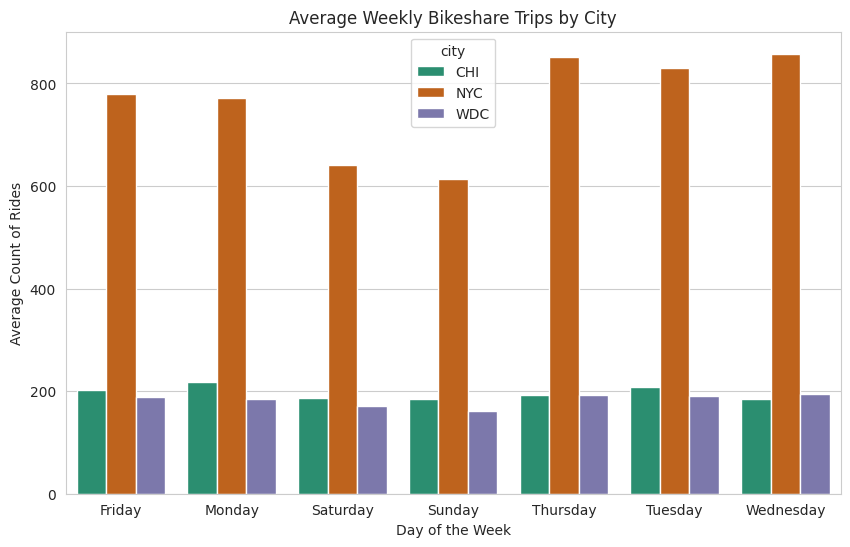

In [ ]:
plt.figure(figsize=(10, 6))

sns.set_style('whitegrid')
weekgraph = sns.barplot(x='dayofweek', y='avgcount', hue='city', data=avgcountdays, palette='Dark2')
weekgraph.set(xlabel = 'Day of the Week', ylabel='Average Count of Rides', title='Average Weekly Bikeshare Trips by City')

plt.show()


#Analyzing the Days of the Week
It looks like there aren't too many similarities in frequency for rides in any specific day of the week. Here are the top days
NYC = Thursday
CHI = Monday
WDC = Wednesday

code sourced from stackoverflow: https://stackoverflow.com/questions/45922291/average-number-of-actions-per-day-of-the-week-using-pandas

We sourced this code for the day of week output https://www.statology.org/max-by-group-in-pandas/ (added size() because without it the dataframe would combine all days and return them with each city so they'd all be Wednesday).

In [ ]:
cod = bikeshare.groupby(['city', 'dayofweek']).size()
maxcod = cod.groupby('city').idxmax()
coddata = cod.loc[maxcod].reset_index(name='count')
coddata

,city,dayofweek,count
0,CHI,Monday,11286
1,NYC,Wednesday,44629
2,WDC,Wednesday,10103


[Text(0.5, 0, 'City Abbreviation'),
 Text(0, 0.5, 'Count of Rides'),
 Text(0.5, 1.0, 'Count of Rides on Most Popular Day of Week by City')]

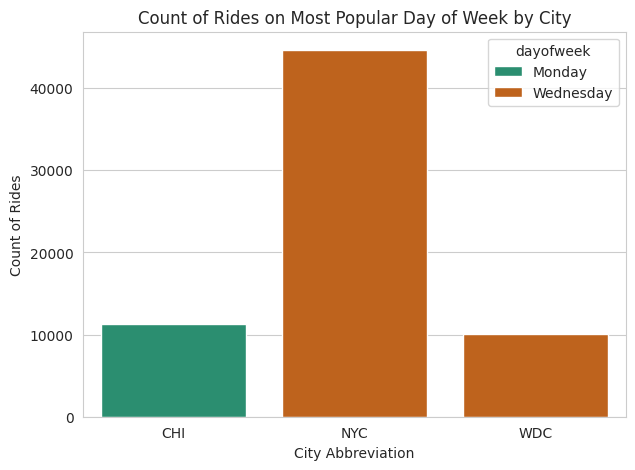

In [ ]:
plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')
codgraph = sns.barplot(coddata, x='city',y='count', hue='dayofweek', palette='Dark2')
codgraph.set(xlabel='City Abbreviation', ylabel='Count of Rides', title='Count of Rides on Most Popular Day of Week by City')

# 2. Can we predict whether a user will be a subscriber or a customer based on attributes and data from a ride? (Decision Tree)

In [ ]:
import statsmodels.api as sm

In [ ]:
bikeshare['usertype'].value_counts()

,count
usertype,
S,352631
C,61907


In [ ]:
bikeshare.isna().sum()

,0
tripid,0
starttime,0
stoptime,0
start station id,0
start station name,0
end station id,0
end station name,0
bikeid,0
usertype,717
city,0


In [ ]:
bikeshare = bikeshare.dropna()

In [ ]:
bikeshare.columns

Index(['tripid', 'starttime', 'stoptime', 'start station id',
       'start station name', 'end station id', 'end station name', 'bikeid',
       'usertype', 'city', 'dayofweek'],
      dtype='object')

*Note: We wanted to use starttime/stoptime to understand the duration, but our model kept crashing due to the overload of records it had to parse through, so we opted for a dayofweek factor.*

In [ ]:
features = ['start station id','end station id','dayofweek']
X = bikeshare[features]
y = bikeshare['usertype']

X = pd.get_dummies(X, drop_first=True)
feature_names = X.columns.tolist()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3000)

randomforest_model = RandomForestClassifier()
randomforest_model.fit(X_train, y_train)

print("Model Evaluation Metrics:")

importances = randomforest_model.feature_importances_
feature_importance = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)
print(feature_importance)

Model Evaluation Metrics:
               Feature  Importance
0     start station id    0.482595
1       end station id    0.463188
4     dayofweek_Sunday    0.022903
3   dayofweek_Saturday    0.022392
7  dayofweek_Wednesday    0.002717
5   dayofweek_Thursday    0.002582
6    dayofweek_Tuesday    0.002514
2     dayofweek_Monday    0.001109


#Working with Limited Parameters
Since our model could not handle start nor endtime, we opted to figure out whether or not a user could be determined a customer or subscriber based on their ride end and start points and the day of week. The location did hold some signfiicance, but the days of which rides are taken do not.



```
```

# 3. Which stations are the most popular start/end points?

In [ ]:
# Most popular end points


# creating dataframe with columns city, end station id, end station name
endstationdf = bikeshare[['city', 'end station id', 'end station name']]

# grouped it by city and end station id
# creating a count column in the dataframe called count
# use transform 'size' counts how many times each end station id is in the dataframe and outputs it as a count
endstationdf['count'] = endstationdf.groupby(['city', 'end station id'])['end station id'].transform('size')

#idxmax basically just finds the biggest value in a query so we're grouping endstationdf by city and asking it to find whatever value occurs the most
maxendstationdf = endstationdf.loc[endstationdf.groupby('city')['count'].idxmax()]

#now we're just piecing together the new df by all the pulled data bc if we didn't do this it would just try and insert itself into the big dataframe
  #with all the records and wouldn't be able to differentiate which station was the biggest because in order to get that output
  #we'd have to wipe everything so endstationdf is our reference maxendstationdf
  #is our output

maxendstationdf = maxendstationdf[['city', 'end station id', 'end station name', 'count']]
maxendstationdf

<ipython-input-30-69d52849bed7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endstationdf['count'] = endstationdf.groupby(['city', 'end station id'])['end station id'].transform('size')


,city,end station id,end station name,count
69,CHI,35,Streeter Dr & Grand Ave,2020
72181,NYC,519,Pershing Square North,2971
348934,WDC,31623,Columbus Circle / Union Station,1443


- ny stop : by grand central terminal
- chi stop : navy pier terminal
- wdc stop : is a metro station

#Why are these stations the most popular?#
To understand why these end stations were the most popular in these cities, we took a look at their locations and the surrounding buildings to see if there were any similarities between the stops or any significant landmarks.

## Some Observations:##
We noticed that several of these stops had popular locations nearby such as Streeter Dr & Grand Ave, which had several monuments, NYC, which had famous tourist attractions such as Bryant Park and is walking distance from Times Square, and WDC which has tourist attractions such as the National Mall and several museums. However, there was one similarity that the three stations shared.

##Each Stations Surrounding Areas:
The Pershing Square North end station in New York City is directly across the street from the Grand Central Terminal, which one of the largest train stations in NYC. People use it for the NYC subways that travel within the city, but also the LIRR, Hudson Lines, Harlem lines, and others that travel to stations in Westchester and further upstate New York.

The Streeter Dr & Grand Ave end station in Chicago is is directly next to the Navy Pier Terminal. This is a public transportation terminal that conveniently has several transportation options such as trains, busses, and taxis.

The Columbus Circle / Union Station stop in WDC is a bus and train hub featuring other private methods of transportation in a centralized area, however typically only is utilized for its public transit. It is the main train station for Washington DC and has several lines of busses and trains such as Amtrak, MARC, VRE Commuter Rail, and Greyhound bus service.


##The Similarities:##
Clearly a large similarity seen between the three popular train stations in NYC, Chicago, and Washington DC is the fact that they are extremely close, or are, transportation areas that give access to mainly trains and busses. From this information gathered, it is safe to assume that people who end their rides at any of these three locations are most likely continuing their commute, from whereever it may have begun, at one of these transportation locations. They could also be going to one of the famous or popular locations mentioned earlier, although considering that the most famous stops in several different cities are each located directly by a train station, they are more than likely to be using bikeshare to arrive at these stations.

In [ ]:
# Most popular start points
startstationdf = bikeshare[['city', 'start station id', 'start station name']]
startstationdf['count'] = startstationdf.groupby(['city', 'start station id'])['start station id'].transform('size')
maxstartstationdf = startstationdf.loc[startstationdf.groupby('city')['count'].idxmax()]
maxstartstationdf = maxstartstationdf[['city', 'start station id', 'start station name', 'count']]
maxstartstationdf

<ipython-input-31-f8e7ec771c59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  startstationdf['count'] = startstationdf.groupby(['city', 'start station id'])['start station id'].transform('size')


,city,start station id,start station name,count
63,CHI,35,Streeter Dr & Grand Ave,1837
72249,NYC,519,Pershing Square North,2965
348998,WDC,31623,Columbus Circle / Union Station,1388


#Why are these starting points popoular?#
We did similar research for the starting points as we did for the end points because the same stations are most popular for both starting or ending a ride in these cities. We observed that each station is very close to a nearby transportation station. Since each station has this in common, we came to the conclusion that riders are most likely exiting the transportation stations after commuting from somehwere whose distance is too far to travel with by bike alone, exiting at the train/bus stop closest to their final destination, and finally using Bikeshare to arrive at their destination.

#4. What is the busiest day of the year in each city? What is the busiest hour of the busiest day in each city?

.isin() function sourced by https://www.geeksforgeeks.org/python-pandas-dataframe-isin/

In [ ]:
#dtype should be 'O', so we have to convert back to dt64

bikeshare['starttime'] = pd.to_datetime(bikeshare['starttime'])

#create new df to not screw with bikeshare

newbikeshare = bikeshare[['city', 'starttime']]

#since we have starttime as dt lets split them into day and hour columns to help break it up for categorization on our graph later

newbikeshare['day'] = newbikeshare['starttime'].dt.date
newbikeshare['hour'] = newbikeshare['starttime'].dt.hour

#create a trip number column by taking the amount of trips from each day by grouping from city and day

dailytrips = newbikeshare.groupby(['city', 'day']).size().reset_index(name='trips')

#you know the deal on this one (finding the biggest of what we tell it to)

busiestday = dailytrips.loc[dailytrips.groupby('city')['trips'].idxmax()]

#this basically takes the query of what we pulled and inserts it into our new df so it indexes it (i was going crazy until geeksforgeeks saved me)

bikeshare_busiest_day = newbikeshare[newbikeshare['day'].isin(busiestday['day'])]

#rinse and repeat but on an hourly basis

hourlytrips = bikeshare_busiest_day.groupby(['city', 'day', 'hour']).size().reset_index(name='hourlytrips')

#same old but hourly

busiesthour = hourlytrips.loc[hourlytrips.groupby('city')['hourlytrips'].idxmax()]

#used my dida181 skills to left merge this and we have our product

busyhourday = pd.merge(busiestday, busiesthour[['city', 'hour', 'hourlytrips']], on='city', how='left')
busyhourday


<ipython-input-32-65324cdc6a48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikeshare['starttime'] = pd.to_datetime(bikeshare['starttime'])
<ipython-input-32-65324cdc6a48>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newbikeshare['day'] = newbikeshare['starttime'].dt.date
<ipython-input-32-65324cdc6a48>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,city,day,trips,hour,hourlytrips
0,CHI,2016-07-16,490,12,50
1,NYC,2016-10-06,1374,18,168
2,WDC,2016-06-17,311,17,37


# Following Trends
There seems to be no trend between cities in most popular trip starting points, so individualized research on each city will have to be conducted in order to tailor to localized bikeshare operational needs.

#Breaking down the data
In order to better understand how our business works in each city, we'll break activity down to the hour to understand where we may be lacking. Below we'll make three graphs of each city taking the amount of trips each hour by the day of week.

In [ ]:
hourgraph = bikeshare[['starttime','city']]
hourgraph['day'] = hourgraph['starttime'].dt.date
hourgraph['hour'] = hourgraph['starttime'].dt.hour
hourgraph = hourgraph.groupby(['city', 'day', 'hour']).size().reset_index(name='trips')
hourgraph['day'] = pd.to_datetime(hourgraph['day'])
hourgraph['dayofweek'] = hourgraph['day'].dt.day_name()

<ipython-input-33-fc01f430d502>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourgraph['day'] = hourgraph['starttime'].dt.date
<ipython-input-33-fc01f430d502>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourgraph['hour'] = hourgraph['starttime'].dt.hour


In [ ]:
hourgraph.groupby(['city','dayofweek'])['trips']
hourgraph

,city,day,hour,trips,dayofweek
0,CHI,2016-01-01,0,1,Friday
1,CHI,2016-01-01,1,2,Friday
2,CHI,2016-01-01,3,1,Friday
3,CHI,2016-01-01,10,2,Friday
4,CHI,2016-01-01,11,2,Friday
...,...,...,...,...,...
22373,WDC,2016-12-31,18,3,Saturday
22374,WDC,2016-12-31,19,2,Saturday
22375,WDC,2016-12-31,20,1,Saturday
22376,WDC,2016-12-31,21,3,Saturday


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

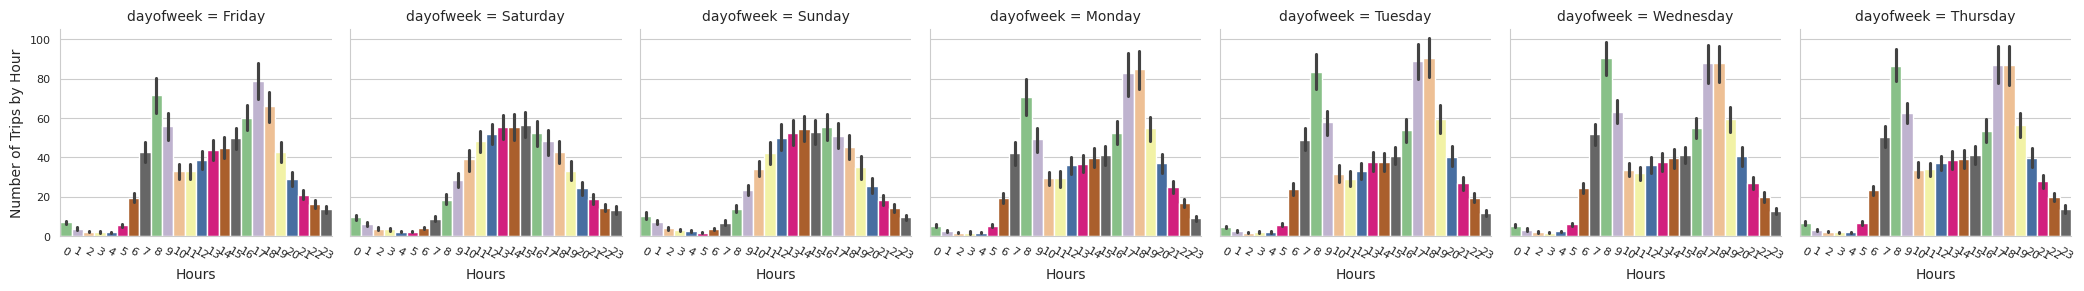

In [ ]:
hourgraphnyc = hourgraph.loc[hourgraph['city']=='NYC']
sns.set_style('whitegrid')
nychourplot = sns.FacetGrid(hourgraphnyc, col='dayofweek')
nychourplot.map(sns.barplot, 'hour', 'trips',palette='Accent',width=1)
nychourplot.set(xlabel='Hours', ylabel='Number of Trips by Hour')
nychourplot.set_xticklabels(rotation=330)
nychourplot.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='x', width=4)

#NYC Plot (click on plots to enlarge)
On weekdays, we see a peak in usage in the morning and evenings, most likely catering to 9-5 workers that want to ride a bike home rather than take the bus or subway. The weekends have a more consistent rise and fall, peaking between 12-3pm.

It looks like there aren't too many discrepancies in WDC and CHI, but NYC has a drop in bikeshare on weekends. As a business, we may consider that people may prefer to use our service for commuting to work, and build a better business model for leisure and recreation to further increase our revenue.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

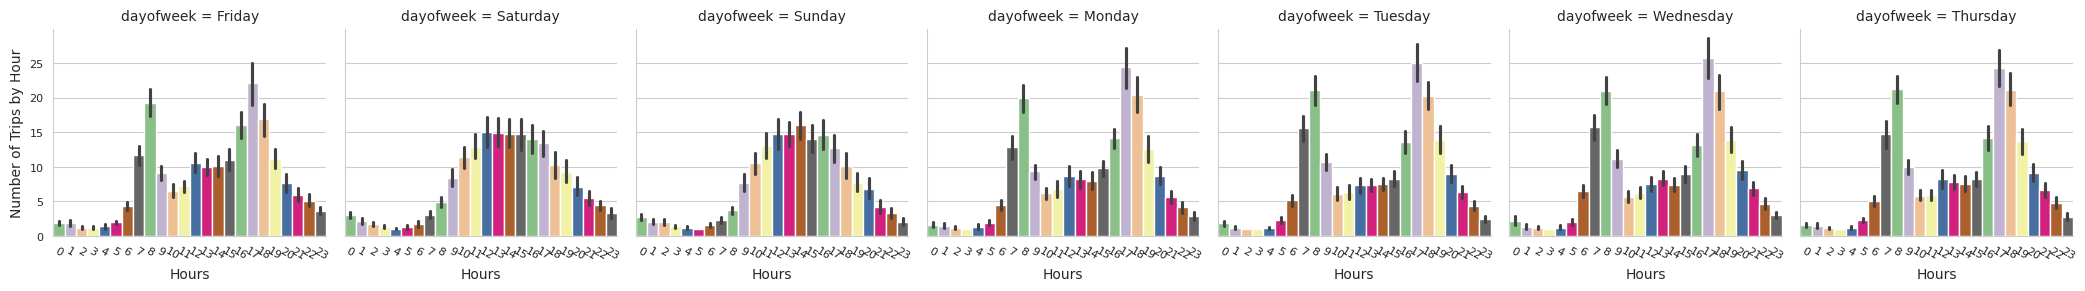

In [ ]:
hourgraphwdc = hourgraph.loc[hourgraph['city']=='WDC']
sns.set_style('whitegrid')
wdchourplot = sns.FacetGrid(hourgraphwdc, col='dayofweek')
wdchourplot.map(sns.barplot, 'hour', 'trips',palette='Accent',width=1)
wdchourplot.set(xlabel='Hours', ylabel='Number of Trips by Hour')
wdchourplot.set_xticklabels(rotation=330)
wdchourplot.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='x', width=4)

#Washington DC Plot
Washington DC looks a lot like NYC, but with less aggregated trips between the hours of 8 aand 3. NYC seems to have a more stable decreasing slope between the beginning and ends of working days. Washington has significant drops after 7AM, and picks up around 4-7PM with a peak at 5. We should figure out when most people start their work in WDC, and how to make the other hours more appealing to get more working people to use bikeshare.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

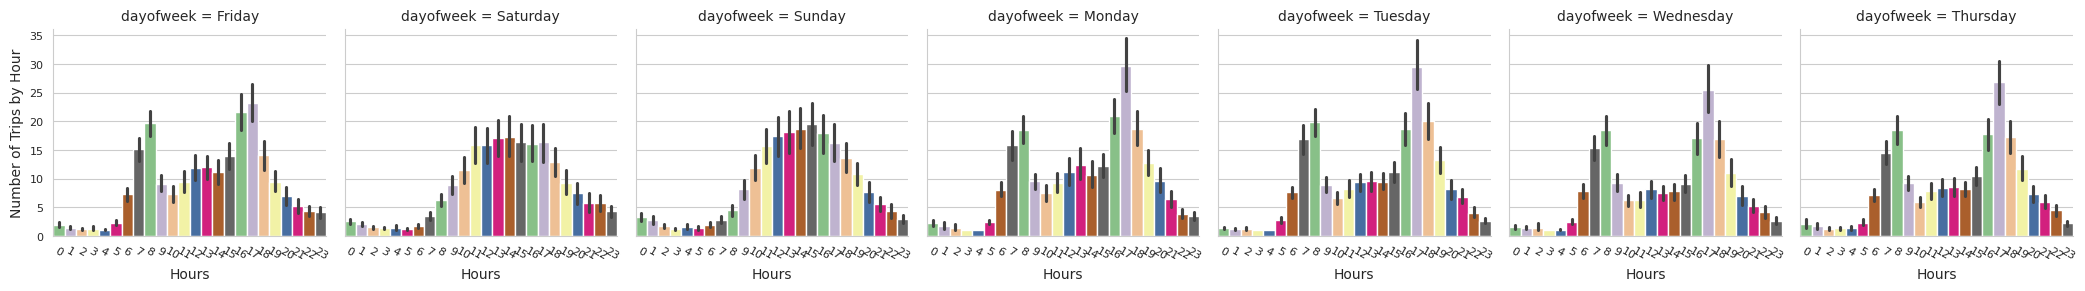

In [ ]:
hourgraphchi = hourgraph.loc[hourgraph['city']=='CHI']
sns.set_style('whitegrid')
chihourplot = sns.FacetGrid(hourgraphchi, col='dayofweek')
chihourplot.map(sns.barplot, 'hour', 'trips',palette='Accent',width=1)
chihourplot.set(xlabel='Hours', ylabel='Number of Trips by Hour')
chihourplot.set_xticklabels(rotation=330)
chihourplot.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='x', width=4)

#Chicago Plot

Chicago seems to follow the same trends as WDC, so whatever business plan we may implement there can be done for here.